# Определение перспективного тарифа для телеком-компании. 
# Цель: Определить, тариф «Смарт» или «Ультра» является более выгодным для компании.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Группировка-и-обьединение-данных" data-toc-modified-id="Группировка-и-обьединение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Группировка и обьединение данных</a></span></li><li><span><a href="#Подсчет-выручки" data-toc-modified-id="Подсчет-выручки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подсчет выручки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-минут-разговора-,-сообщений,--интернет-трафика" data-toc-modified-id="Анализ-минут-разговора-,-сообщений,--интернет-трафика-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ минут разговора , сообщений,  интернет-трафика</a></span></li><li><span><a href="#Анализ-выручки-по-тарифам" data-toc-modified-id="Анализ-выручки-по-тарифам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ выручки по тарифам</a></span></li><li><span><a href="#Подсчет-дисперсии,-стандартного-отклонения,-средних-значений" data-toc-modified-id="Подсчет-дисперсии,-стандартного-отклонения,-средних-значений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подсчет дисперсии, стандартного отклонения, средних значений</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-выручки-по-тарифам" data-toc-modified-id="Гипотеза-о-равенстве-выручки-по-тарифам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза о равенстве выручки по тарифам</a></span></li><li><span><a href="#Гипотеза-о-равенстве-выручки-в-Москве-и-регионах" data-toc-modified-id="Гипотеза-о-равенстве-выручки-в-Москве-и-регионах-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза о равенстве выручки в Москве и регионах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файлов

In [1]:
import pandas as pd # Импортирую необходимую библиотеку

calls = pd.read_csv('/datasets/calls.csv', sep = ',') # Открываю файлы
internet = pd.read_csv('/datasets/internet.csv', sep = ',')
messages = pd.read_csv('/datasets/messages.csv', sep = ',')
tariffs = pd.read_csv('/datasets/tariffs.csv' , sep = ',')
users = pd.read_csv('/datasets/users.csv', sep = ',')                      

def f(df): # Создаю функцию, которая последовательно применит методы для первоначальной оценки данных
    display(df.head())
    df.info()
    print('Дубликатов в таблице:', df.duplicated().sum())
    print('Пропусков в таблице:', df.isna().sum())
    print(df.describe())

f(calls) # Вызываю функцию для каждого фрейма и изучаю информацию.


import warnings # Отключаю предупреждения
warnings.filterwarnings('ignore')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Дубликатов в таблице: 0
Пропусков в таблице: id           0
call_date    0
duration     0
user_id      0
dtype: int64
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


### Вывод


После первого взгляда на данные можно сказать следующее: Названия колонок корректные, явных дубликатов нет. Пропущенные значения есть только в таблице users в столбце churn_date (дата прекращения пользования тарифом). Пропущенное значение не является ошибкой, оначает, что тариф еще действует на момент выгрузки.
Тип всех дат в таблицах object, значит они сейчас как текст,  для перевода в формат даты нужно применить to_datetime().

## Подготовка данных

### Группировка и обьединение данных

In [2]:
# Создаю столбцы с значением месяца для дальнейшей группировки по месяцам в таблицах calls, messages, internet.
#calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls['date'] = calls['call_date'].astype('datetime64[M]')
display(calls.head(3))
messages['date'] = messages['message_date'].astype('datetime64[M]')
display(messages.head(3))
internet['date'] = internet['session_date'].astype('datetime64[M]')
display(internet.head(3))         


,id,call_date,duration,user_id,date
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01


,id,message_date,user_id,date
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01


,Unnamed: 0,id,mb_used,session_date,user_id,date
0,0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-01


In [3]:
# Округляю звонки в большую сторону
import numpy as np
calls['duration'] = np.ceil(calls['duration'])
display(calls.head(5))

,id,call_date,duration,user_id,date
0,1000_0,2018-07-25,0.0,1000,2018-07-01
1,1000_1,2018-08-17,0.0,1000,2018-08-01
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01


In [4]:
# Группирую по месяцам и абоненту и создаю единую таблицу для анализа методом merge()
calls = calls.groupby(['user_id', 'date']).agg({'duration':'sum', 'id':'count'})\
.rename(columns = {'id':'calls'}).reset_index()
internet = internet.groupby(['user_id', 'date']).agg({'mb_used':'sum'}).reset_index()
messages = messages.groupby(['user_id', 'date']).agg({'id':'count'})\
.rename(columns = {'id':'messages'}).reset_index()
df_merged = calls.merge(internet, on = ['user_id', 'date'], how = 'outer')\
.merge(messages, on = ['user_id', 'date'], how = 'outer').fillna(0)
df_merged = df_merged.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
pd.set_option('display.max_columns', None)
display(df_merged.head(5))

,user_id,date,duration,calls,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,159.0,22.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,172.0,43.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,340.0,47.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,408.0,52.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,466.0,58.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [5]:
# В тарифе цена указана за gb, а  расход посчитан в mb. Переведу все в gb и округлю в большую сторону.
df_merged['mb_used'] = (df_merged['mb_used']/1024).apply(np.ceil)
df_merged['mb_per_month_included'] = df_merged['mb_per_month_included']/1024
df_merged.rename(columns={'mb_used': 'gb_used', 'mb_per_month_included':'gb_per_month_included'}, inplace=True)


### Подсчет выручки

In [6]:
# Создаю функцию для подсчета помесячной выручки с каждого пользователя 

def revenue(row):
    rub_monthly_fee = row['rub_monthly_fee']
    if(row['gb_used'] - row['gb_per_month_included'])>0:
        internet_fee = ((row['gb_used']-row['gb_per_month_included'])*row['rub_per_gb'])
    else: internet_fee = 0
        
    if(row['messages'] - row['messages_included'])>0:
        messages_fee = ((row['messages']-row['messages_included'])*row['rub_per_message'])
    else: messages_fee = 0
        
    if(row['duration'] - row['minutes_included'])>0:
        minutes_fee = ((row['duration']-row['minutes_included'])*row['rub_per_minute'])
    else: minutes_fee = 0
        
    revenue_per_user = internet_fee + messages_fee + minutes_fee + rub_monthly_fee
    return revenue_per_user

# Создаю столбец revenue со значением выручки и применяю функцию
df_merged['revenue'] = df_merged.apply(revenue, axis=1)
pd.set_option('display.max_columns', None)
display(df_merged.head(10))

,user_id,date,duration,calls,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,2018-05-01,159.0,22.0,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
1,1000,2018-06-01,172.0,43.0,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
2,1000,2018-07-01,340.0,47.0,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
3,1000,2018-08-01,408.0,52.0,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
4,1000,2018-09-01,466.0,58.0,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
5,1000,2018-10-01,350.0,57.0,15.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
6,1000,2018-11-01,338.0,43.0,15.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
7,1000,2018-12-01,333.0,46.0,10.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra,1950.0
8,1001,2018-11-01,430.0,59.0,18.0,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15.0,500,550,200,3,3,smart,1150.0
9,1001,2018-12-01,414.0,63.0,14.0,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15.0,500,550,200,3,3,smart,550.0


### Вывод

Данные сгруппированы в единую таблицу для каждого пользователя по месяцам. Посчитано количество сделанных звонков(calls),израсходованных минут разговора (duration), количество отправленных сообщений (messages), объем израсходованного интернет-трафика в Гб по месяцам(gb_used).  Минуты разговора и трафик округлены в большую сторону и посчитана помесячная выручка с каждого пользователя (revenue).


##  Анализ данных

### Анализ минут разговора , сообщений,  интернет-трафика

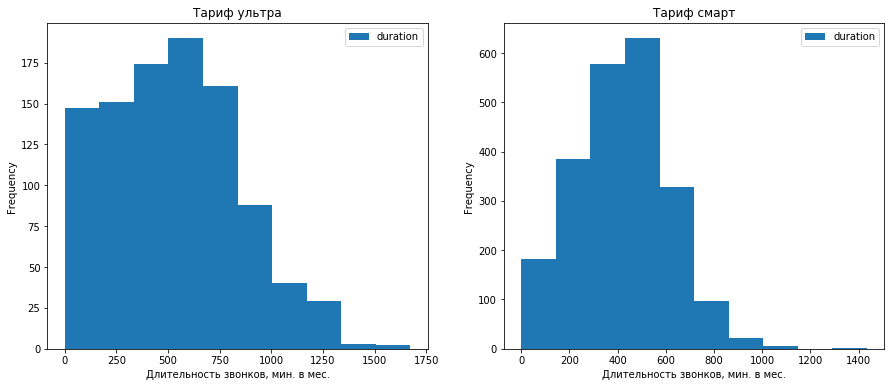

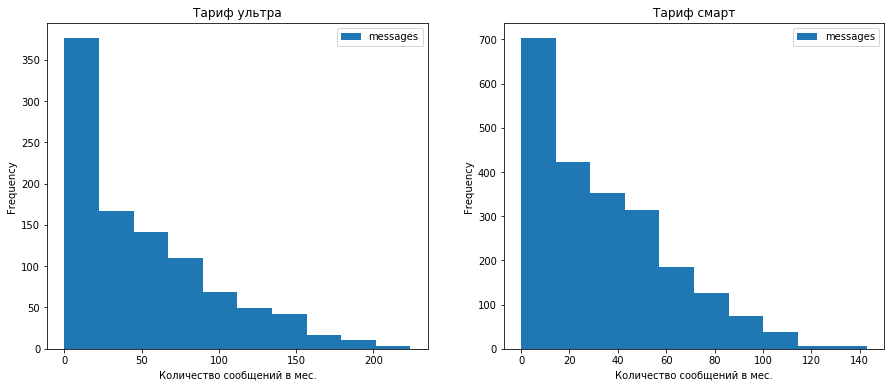

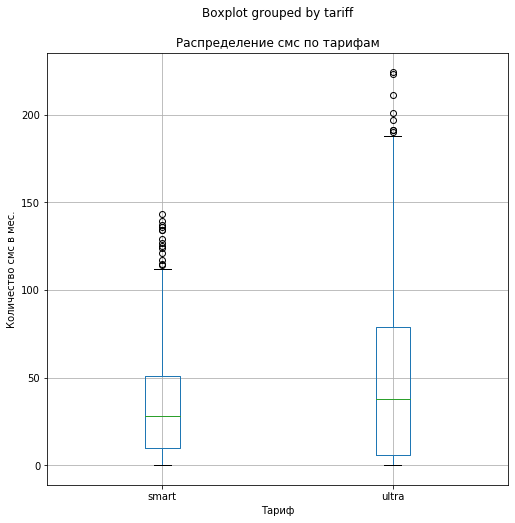

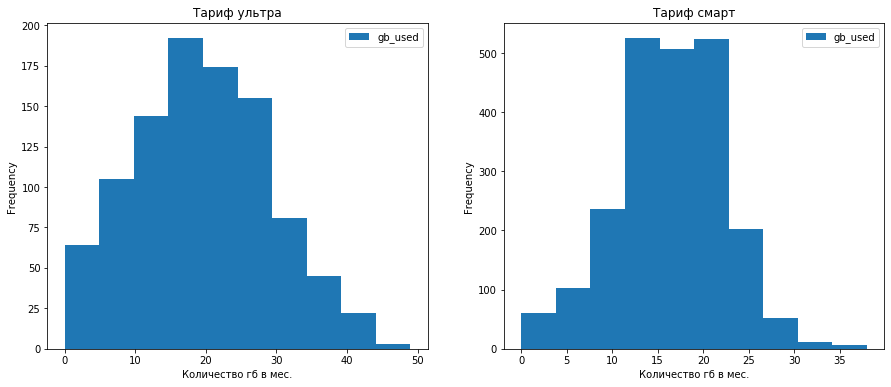

In [7]:
# Построю гистограммы с разбивкой по тарифам
import matplotlib.pyplot as plt

def hist (a, b): # Функция для построения гистограмм по тарифам
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    df_merged.query('tariff=="ultra"').plot(kind='hist', bins=10, y=a, title='Тариф ультра', ax=axes[0]).set_xlabel(b)
    df_merged.query('tariff=="smart"').plot(kind='hist', bins=10, y=a, title='Тариф смарт', ax=axes[1]).set_xlabel(b)
    plt.show()
    
# Построим гистограммы для звонов   
hist ('duration', 'Длительность звонков, мин. в мес.')

# Судя по гистограммам звонков выигрывает тариф ультра, среднее количество минут в мес. 500 против 400.
# И максимальные значения у тарифа ультра выше, явно абоненты разговаривают больше. 
# Распределения на графиках менее нормальное, со сдвигом в левую сторону к нулям. 
# Такой эффект дают пропущенные звонки в выборке.


# Посмотрим смс
hist ('messages', 'Количество сообщений в мес.')

# Sms популярнее у абонентов тарифа ультра.
# Хотя большое количество нулевых значений говорят о непопулярности этой услугя для обоих тарифов.
# Распределение не-нормальное. Пик приходится на околонулевые значения. Даже среднее по графику не понять
# Придется строить диаграмму размаха

ax = df_merged.boxplot(column='messages', by='tariff', figsize=(8,8))
ax.set_title('Распределение смс по тарифам')
ax.set_xlabel('Тариф')
ax.set_ylabel('Количество смс в мес.')
# Медиана для смс в тарифе ультра около 40, а в тарифе смарт около 30


# Построим гистограммы для интернет-трафика
hist ('gb_used', 'Количество гб в мес.')

# Интернета абоненты тарифа ультра также тратят больше
# Распределение более похоже на нормальное, скошено влево к нулевым значениям 
# неудачных попыток подключения или абонентов не использующих мобильный интернет

### Анализ выручки по тарифам

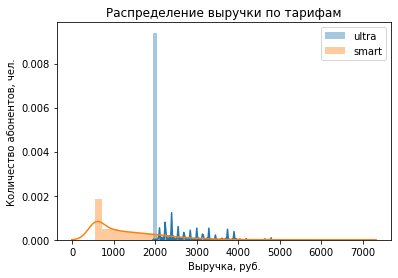

In [8]:
# Строю графики по выручке с разбивкой по тарифам
import seaborn as sns

for tariff in df_merged['tariff'].unique():
    current = df_merged.query('tariff==@tariff')
    sns.distplot(current['revenue'], label = tariff)
plt.legend()
plt.title('Распределение выручки по тарифам')
plt.xlabel('Выручка, руб.')
plt.ylabel('Количество абонентов, чел.')
plt.show()

# На графике четко видны пики абонентской платы по тарифам
# Распределение выручки по тарифу смарт более нормальное, с длинным хвостом вправо
# Распределение выручки по тарифу ультра не-нормальное, скошено влево, самое большое значение - абонентская плата

### Подсчет дисперсии, стандартного отклонения, средних значений

In [9]:
# Посчитаем средние значения, дисперсию и стандартное отклонение
# Для среднего значения и стандартного отклонения использую метод describe, а для дисперсии var()
print('Тариф ультра')
display(df_merged.query('tariff=="ultra"')[['duration', 'gb_used', 'messages', 'revenue']].describe().T.style.format('{:.2f}'))

print('Тариф смарт')
display(df_merged.query('tariff=="smart"')[['duration', 'gb_used', 'messages', 'revenue']].describe().T.style.format('{:.2f}'))
# Средние значения практически совпадают с медианой, 
# Значит выбросы и нули не значительны и слабо вляют на средне
import numpy as np
print('Дисперсия тариф ультра')
variance = np.var(df_merged.query('tariff=="ultra"')[['duration', 'gb_used', 'messages', 'revenue']])
print(variance)

print('Дисперсия тариф смарт')
variance = np.var(df_merged.query('tariff=="smart"')[['duration', 'gb_used', 'messages', 'revenue']])
print(variance)

Тариф ультра


,count,mean,std,min,25%,50%,75%,max
duration,985.00,526.62,317.61,0.00,284.00,518.00,752.00,1673.00
gb_used,985.00,19.49,9.85,0.00,12.00,19.00,27.00,49.00
messages,985.00,49.36,47.80,0.00,6.00,38.00,79.00,224.00
revenue,985.00,2070.15,376.19,1950.00,1950.00,1950.00,1950.00,4800.00


Тариф смарт


,count,mean,std,min,25%,50%,75%,max
duration,2229.00,417.93,190.31,0.00,282.00,422.00,545.00,1435.00
gb_used,2229.00,16.33,5.75,0.00,13.00,17.00,20.00,38.00
messages,2229.00,33.38,28.23,0.00,10.00,28.00,51.00,143.00
revenue,2229.00,1289.97,818.40,550.00,550.00,1023.00,1750.00,6770.00


Дисперсия тариф ультра
duration    100771.223617
gb_used         96.993116
messages      2282.946075
revenue     141373.073256
dtype: float64
Дисперсия тариф смарт
duration     36203.066652
gb_used         33.013887
messages       796.455483
revenue     669485.220923
dtype: float64


### Вывод

Пользователи тарифа ультра тратят в месяц в среднем больше минут, смс и интернета.
Звонки в среднем 497.55 мин в тарифе ультра, 394.92 мин в тарифе смарт. Стандартное отклонение по звонкам в тарифе ультра 299.93, а в тарифе смарт 179.98, дисперсия 89866.39 и 32378.37. Получается, среди абонентов ультры много и тех, кто мало разговаривает, и тех, кто говорит очень много. В тариф ультра включено 3000 минут, а 75% пользователей выговаривают только 712 минут, максимальное значение 1579 минут.
В тариф смарт включено 500 минут, и большая часть пользователей как раз их и выговаривают.

Среднее количество смс в тарифе ультра 49, а в тарифе смарт 33; стандартные отклонения 47.8 и 28.23; дисперсия 2282.94 и 796.4. Разброс количества смс в тарифе ультра также выше.
Однако, большинство абонентов не выходят за рамки уже включенных в тариф смс. Это не популярная услуга.

Среднее количество потраченных гб в мес в тарифе ультра 19.49, а в тарифе смарт 16.33; стандартное отклонение  9.85 и 5.75; дисперсия 96.99 и 33.01. Да, пользователи тарифа ультра в среднем тратят интернета больше, но разница между тарифами не большая. Небольшое стандартное отклонение и дисперсия указывают на то, что все абоненты тратят примерно одинаково много гб и выходят за рамки лимитов тарифов.

В итоге, в среднем абонент ультры тратит 2070 руб. на телефон, а абонент тарифа смарт 1257 руб.
Стандартное отклонение по выручке ультра 376.19 и смарт 800.92, дисперсия ультра 141 373, смарт 641 178.
Разброс выручки в тарифе смарт выше, так как многим абонентам сложно уложится в лимит по интернету и звонкам.

## Проверка гипотез

### Гипотеза о равенстве выручки по тарифам

In [10]:
# Проверим нулевую гипотезу:
# Средняя выручка оператора мобильной связи по тарифу «Ультра» 
# равна средней выручке по тарифу «Смарт».
# Альтернативная гипотеза: Средняя выручка по тарифам различается.
from scipy import stats as st
alpha = .05 #Критический уровень статистической значимости, означает допустимый уровень ошибки 5 %
# Если p-value меньше его, гипотеза будет отвергнута

results = st.ttest_ind(
    df_merged.query('tariff=="smart"')['revenue'],
    df_merged.query('tariff=="ultra"')['revenue'],
equal_var = False) #Значение False так как выборки разного размера

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

# Нулевая гипотеза отвергается в пользу альтернативной
# Статистический тест подтверждает, что средняя выручка по тарифам различается.

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Гипотеза о равенстве выручки в Москве и регионах

In [11]:
# Проверим нулевую гипотезу:
# Cредняя выручка компании по абонентам из Москвы равна средней выручке по абонентам из других регионов
# Альтернативная гипотеза: Средняя выручка по Москве отличается от средней выручки по регионам

alpha = .05 #Критический уровень статистической значимости, означает допустимый уровень ошибки 5 %
# Если p-value меньше его, гипотеза будет отвергнута

results = st.ttest_ind(
    df_merged.query('city=="Москва"')['revenue'],
    df_merged.query('city!="Москва"')['revenue'],
equal_var = False) #Значение False так как выборки разного размера

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
# Стат-тест показал,нельзя утверждать, что средняя выручка по Москве отличается
# от средней выручки по регионам.

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Вывод

Двусторонние стат-тесты показали, что средняя выручка оператора мобильной связи по тарифам «Ультра» и «Смарт» различается. И нельзя утверждать, что средняя выручка по Москве отличается от средней выручки по регионам.

## Общий вывод

Проведенный анализ и стат-тест подтвердили разницу в прибыльности тарифов. Тариф "Ультра" для компании является более выгодным и перспективным. В среднем абонент в этом тарифе тратит 2070 руб. ежемесячно, а в тарифе "Смарт" 1258 руб. В тариф ультра включено 3000 минут, а абоненты в среднем тратят 497 минут. В тариф "Смарт" включены 500 минут, абоненты тратят в среднем 395 минут.
Среднее количество потраченных гб в мес в тарифе ультра 19.49 (включены 30), а в тарифе смарт 16.33 (включены 15). Большинство абонентов не выходят за рамки уже включенных в тариф смс. 
Получается, абоненты "Ультра" в среднем тратят ненамного больше минут и гб, а платят в среднем на 64% больше абонентов тарифа "Смарт".
